<AxesSubplot:xlabel='species', ylabel='sepal_length'>

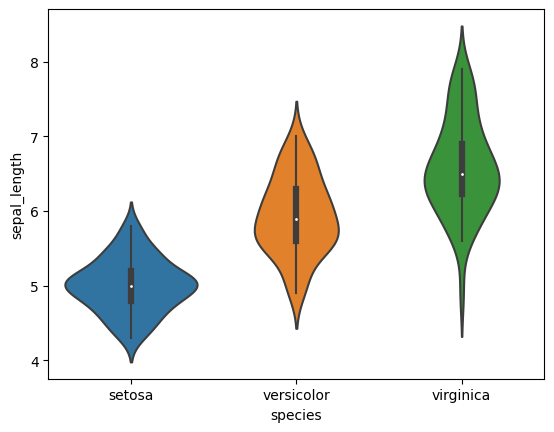

In [2]:
# library & dataset
import seaborn as sns
df = sns.load_dataset('iris')

# plot
sns.violinplot(x=df["species"], y=df["sepal_length"])

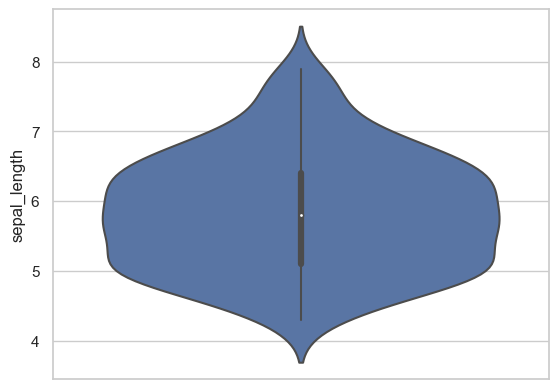

In [4]:
# libraries & dataset
import matplotlib.pyplot as plt
# 테마 지정 (총 5개의 테마가 존재 -> darkgrid, whitegrid, dark, white, ticks)
sns.set(style = 'whitegrid') # sns.set_style('darkgrid')도 같은 기능


# Make boxplot for one group only
sns.violinplot(y=df["sepal_length"])
plt.show()

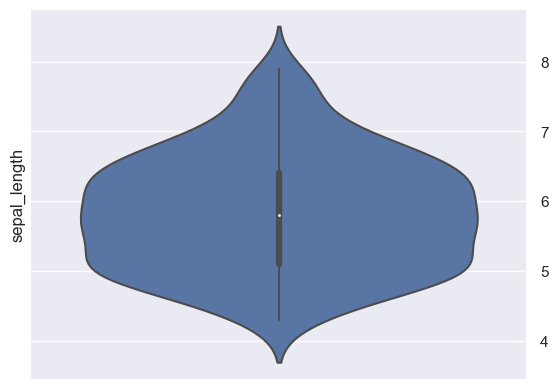

In [29]:
sns.set(style = 'darkgrid') 
sns.violinplot(y=df["sepal_length"])

# despine은 테두리 제거
# 기본값은 top, right가 제거가 되며, 필요할 때, False로 테두리를 나타나게하면 된다
sns.despine(left=True, bottom=True, top=False, right= False)
plt.show()

<AxesSubplot:ylabel='sepal_length'>

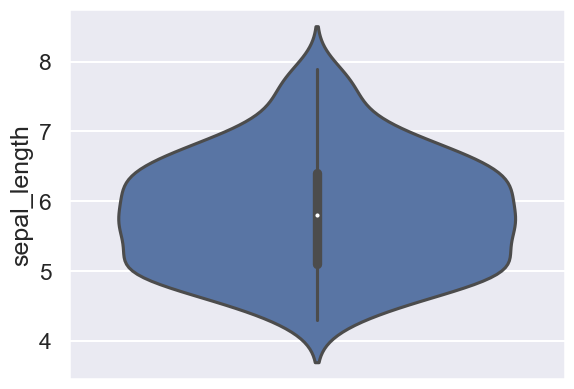

In [28]:
sns.set_style("darkgrid")
# set_context는 전체적인 스케일을 조정한다. 총 4가지가 존재 paper, notebook, talk, poster
sns.set_context("talk")
sns.violinplot(y=df["sepal_length"])

<AxesSubplot:ylabel='sepal_length'>

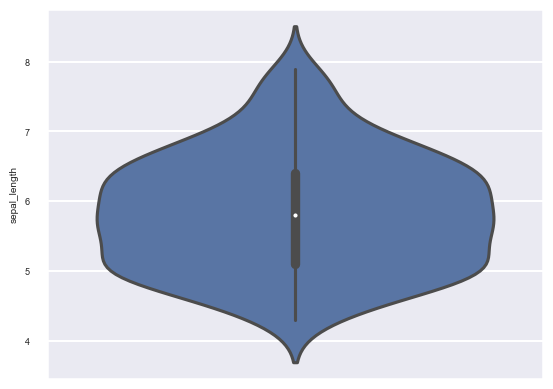

In [27]:
sns.set_style("darkgrid")
# set_context 내에 "font_scale"로 font 사이즈를 조정할 수 있다.
sns.set_context("talk", font_scale= 0.4)
sns.violinplot(y=df["sepal_length"])

<AxesSubplot:ylabel='sepal_length'>

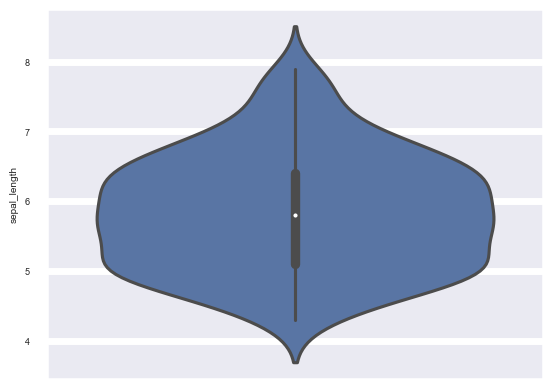

In [26]:
sns.set_style("darkgrid")
# set_context 내에 rc={"grid.linewidth": '숫자'}눈금의 너비를 조정할 수 있다. 
sns.set_context("talk", font_scale= 0.4, rc={"grid.linewidth": 5})
sns.violinplot(y=df["sepal_length"])

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

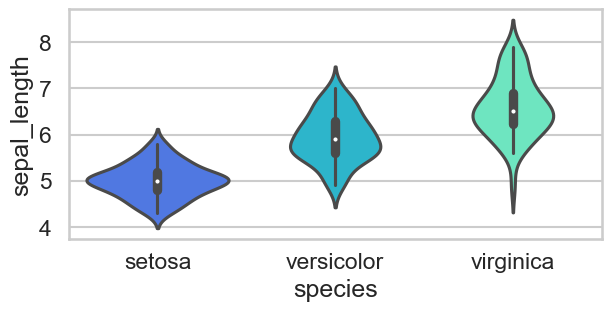

In [94]:
fig, ax = plt.subplots(figsize=(6, 3), constrained_layout=True)
# palette 색상표 ("https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette")
sns.set_theme(style='whitegrid', context='talk', palette='rainbow',
              rc={'grid.linewidth': 2,
                  'grid.color': 'b'})
# 바이올린플롯 안 변경 가능 box, quartile, point, stick, None}
sns.violinplot(x=df["species"], y=df["sepal_length"], inner='box', ax=ax)

In [91]:
print(ax.collections)
print(ax.lines)

<Axes.ArtistList of 6 collections>
<Axes.ArtistList of 6 lines>


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


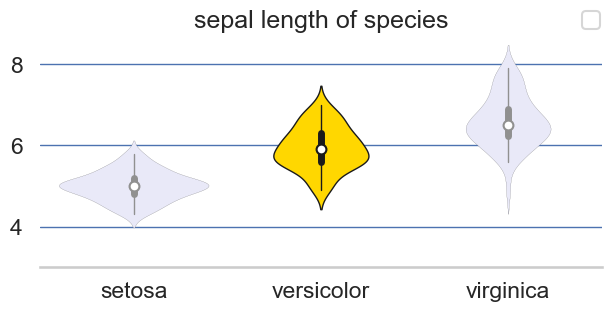

In [116]:
fig, ax = plt.subplots(figsize=(6, 3), constrained_layout=True)
sns.violinplot(x=df["species"], y=df["sepal_length"], ax=ax, color='lavender', linewidth=0.1)

violins = [c for i, c in enumerate(ax.collections) if i%2 == 0] 

# violin plot: PolyCollection
[v.set_edgecolor("k") for v in violins]  # 전체 violin edgecolor 변경
violins[1].set_facecolor("gold")     # versicolor facecolor 변경
violins[1].set_linewidth(1)          # versicolor linewidth 변경
violins[1].set_edgecolor("k")        # versicolor edgecolor 변경

# median marker: PathCollection
markers = [c for i, c in enumerate(ax.collections) if i%2 == 1]  
markers[1].set_facecolor("w")         # versicolor median facecolor 변경
markers[1].set_edgecolor("k")         # versicolor median edgecolor 변경
[m.set_sizes([50]) for m in markers]  # 전체 median size 변경

# box-whisker: Line2D
ls = [l for i, l in enumerate(ax.lines)]
ls[-4].set_color("k")                 # versicolor whisker 색상 변경
ls[-3].set_color("k")                 # versicolor box 색 변경
[l.set_linewidth(1) for i, l in enumerate(ls) if i%2 == 0] # 전체 box, whisher 굵기 변경
[l.set_linewidth(5) for i, l in enumerate(ls) if i%2 == 1] # 전체 box, whisher 굵기 변경

ax.set_ylim(3, )
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("sepal length of species")
ax.spines[["left", "top", "right"]].set_visible(False)
ax.grid(axis="y", lw=1)

legend = ax.legend()
legend.remove()
fig.legend(loc="upper right", ncol=2)

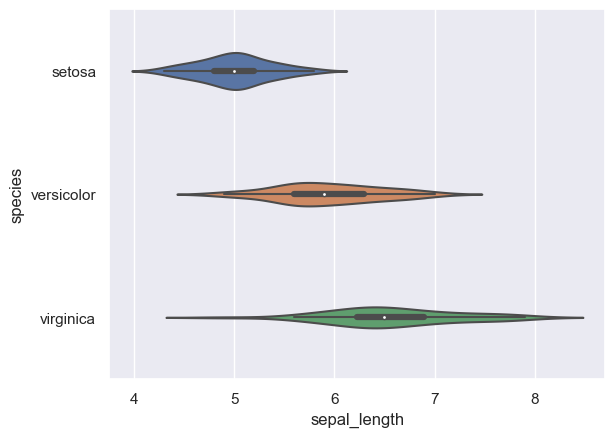

In [6]:
sns.set(style="darkgrid")

# x와 y를 바꾸면 수평으로 그림
sns.violinplot(y=df["species"], x=df["sepal_length"], width=0.3)
plt.show()

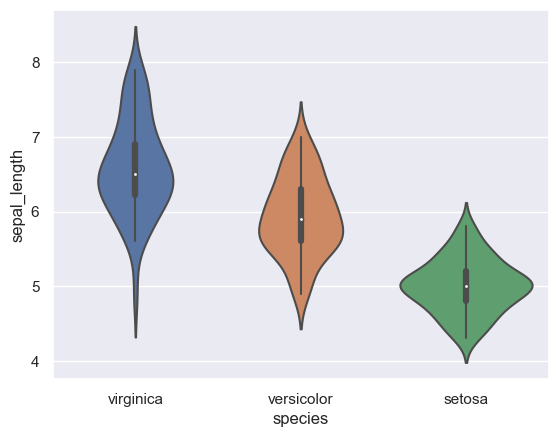

In [8]:
sns.set(style="darkgrid")

# order를 활용해서 순서 변경
sns.violinplot(x='species', y='sepal_length', data=df, order=[ "virginica", "versicolor", "setosa"])
plt.show()

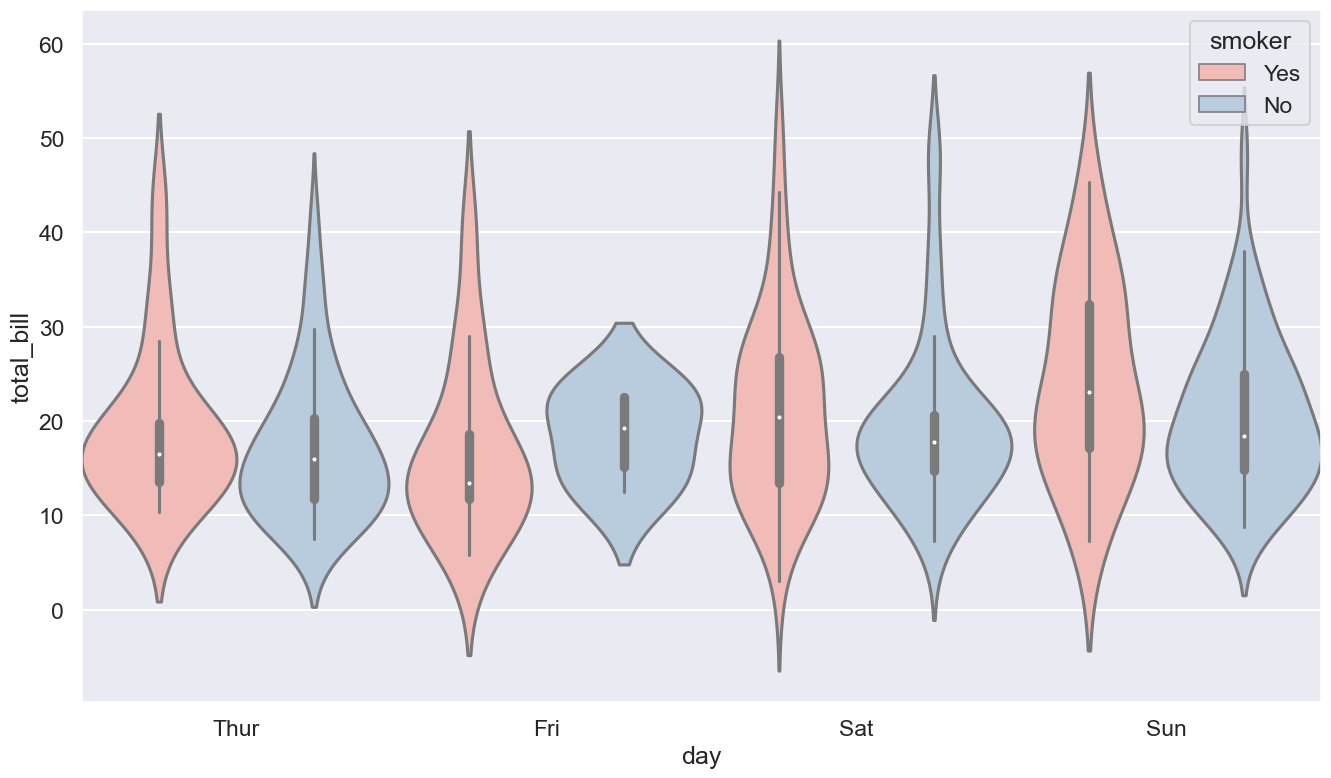

In [13]:
plt.figure(figsize=(16,9))
sns.set(style="darkgrid", context = 'talk')
df = sns.load_dataset('tips')

# hue로 그루핑하기
sns.violinplot(x="day", y="total_bill", hue="smoker", data=df, palette="Pastel1", width=1)
plt.show()

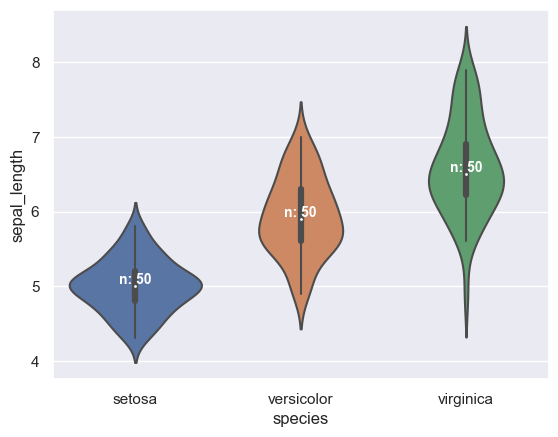

In [14]:
import numpy as np
sns.set(style="darkgrid")
df = sns.load_dataset('iris')
 
# Basic violinplot stored in a matplotlib.axes object
ax = sns.violinplot(x="species", y="sepal_length", data=df)
 
# Calculate number of obs per group & median to position labels
medians = df.groupby(['species'])['sepal_length'].median().values
nobs = df['species'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add text to the figure
pos = range(len(nobs))
for tick, label in zip(pos, ax.get_xticklabels()):
   ax.text(pos[tick], medians[tick] + 0.03, nobs[tick],
            horizontalalignment='center',
            size='small',
            color='w',
            weight='semibold')
plt.show()

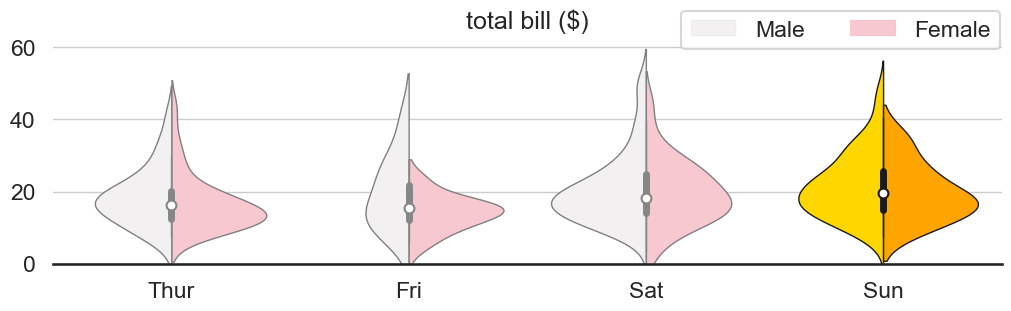

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_context("talk")
sns.set_style("white")

# 데이터셋 불러오기
df = sns.load_dataset("tips")


fig, ax = plt.subplots(figsize=(10, 3), constrained_layout=True)
sns.violinplot(data=df, x="day", y="total_bill", ax=ax,
               color="pink", hue="sex", split=True, linewidth=0.1)

### violin plot: PolyCollection

# Male
violins_M = [c for i, c in enumerate(ax.collections) if i%3 == 0]  
[v.set_edgecolor("gray") for v in violins_M]
[v.set_linewidth(1) for v in violins_M]
violins_M[3].set_facecolor("gold")  # Sunday violin facecolor 변경
violins_M[3].set_linewidth(1)          # Sunday violin facecolor 변경
violins_M[3].set_edgecolor("k")        # Sunday violin edgecolor 변경

# Female
violins_F = [c for i, c in enumerate(ax.collections) if i%3 == 1]  
[v.set_edgecolor("gray") for v in violins_F]
[v.set_linewidth(1) for v in violins_F]
violins_F[3].set_facecolor("orange")  # Sunday violin facecolor 변경
violins_F[3].set_linewidth(1)          # Sunday violin facecolor 변경
violins_F[3].set_edgecolor("k")        # Sunday violin edgecolor 변경

# median marker: PathCollection
markers = [c for i, c in enumerate(ax.collections) if i%3 == 2]  
markers[3].set_facecolor("w")         # Sunday median facecolor 변경
markers[3].set_edgecolor("k")         # Sunday median edgecolor 변경
[m.set_sizes([50]) for m in markers]  # 전체 median size 변경

# # box-whisker: Line2D
ls = [l for i, l in enumerate(ax.lines)]
ls[-2].set_color("k")                 # Sunday whisker 색상 변경
ls[-1].set_color("k")                 # Sunday box 색 변경
[l.set_linewidth(1) for i, l in enumerate(ls) if i%2 == 0] # 전체 box, whisher 굵기 변경
[l.set_linewidth(5) for i, l in enumerate(ls) if i%2 == 1] # 전체 box, whisher 굵기 변경

# # spines 제거, grid 추가, xlabel 제거, ylabel 제거
ax.set_ylim(0, )
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_title("total bill ($)")
ax.spines[["left", "top", "right"]].set_visible(False)
ax.grid(axis="y", lw=1)
legend = ax.legend()
legend.remove()
fig.legend(loc="upper right", ncol=2)